### BLG561E Assignment 2.2: Regularizers

In this notebook, you are going to implement regularization techniques widely used until recently in convolutional networks such as **Max Pooling** and **Dropout**

Find `MaxPool2d`, `BatchNorm`, `Dropout` classes in **layer/layer.py** and complete the implementation of `forward` and `backward` methods for both of them.

In [1]:
import numpy as np
from blg561e.layer.layer import MaxPool2d, Dropout, BatchNorm
from blg561e.checks import rel_error, grad_check
%load_ext autoreload
%autoreload 2

### a. Dropout layer

As we covered in the class, dropout is a well-known regularization technique for preventing overfitting of neural networks. What dropout does is basically zeroing out of some outputs of hidden layers at random. We recommend you to multiply the dropout factor with outputs in forward pass as it is done in common implementations. Recall that this is called **Inverted Dropout**.

For more information on dropout, you can check the paper below.

**Improving neural networks by preventing co-adaptation of feature detectors**, Hinton et al.
https://arxiv.org/pdf/1207.0580.pdf

#### Forward pass

In [26]:
np.random.seed(1773)

x = np.random.randn(1000, 1000) + 1773
for p in [0.3, 0.5, 0.8]:
    dropout = Dropout(p=p)
    dropout.mode = 'train'
    out = dropout.forward(x)
    dropout.mode = 'test'
    out_test = dropout.forward(x)
    print('Dropout rate is: ', p)
    print('Percent of how much of input is zeroed out in training ', (out == 0).mean())
    print('Percent of how much of input is zeroed out in testing', (out_test == 0).mean())

# You can check wheter your implemention is true or not by looking at the percent of outputs set to zero

Dropout rate is:  0.3
Percent of how much of input is zeroed out in training  0.300096
Percent of how much of input is zeroed out in testing 0.0
Dropout rate is:  0.5
Percent of how much of input is zeroed out in training  0.499705
Percent of how much of input is zeroed out in testing 0.0
Dropout rate is:  0.8
Percent of how much of input is zeroed out in training  0.800321
Percent of how much of input is zeroed out in testing 0.0


#### Backward pass

In [27]:
dropout = Dropout(p=0.8)
np.random.seed(1773)
x = np.random.randn(10, 10) + 10
dout = np.random.randn(*x.shape)


out = dropout.forward(x,seed=1773)
dx = dropout.backward(dout)
dx_num = grad_check(lambda xx: dropout.forward(xx, seed=1773), x, dout)

print('Error on dx ', rel_error(dx, dx_num))

Error on dx  1.8928964146513292e-11


### b. MaxPool

#### Forward pass
Implement the forward pass for the max-pooling operation. 

In [28]:
x_shape = (2, 3, 7, 7)
x = np.linspace(-0.3, 0.3, num=np.prod(x_shape)).reshape(x_shape)
maxPool = MaxPool2d(stride = 2, pool_width = 3, pool_height = 3)
out = maxPool.forward(x)

correct_out = np.array([[[[-0.26723549, -0.26313993, -0.25904437],
   [-0.23856655, -0.23447099 ,-0.23037543],
   [-0.20989761, -0.20580205, -0.20170648],],

  [[-0.1668942,  -0.16279863, -0.15870307],
   [-0.13822526, -0.13412969, -0.13003413],
   [-0.10955631, -0.10546075, -0.10136519],],

  [[-0.0665529,  -0.06245734, -0.05836177],
   [-0.03788396, -0.0337884,  -0.02969283],
   [-0.00921502, -0.00511945, -0.00102389],],],


 [[[ 0.0337884 ,  0.03788396,  0.04197952],
   [ 0.06245734,  0.0665529,   0.07064846],
   [ 0.09112628,  0.09522184,  0.09931741],],

  [[ 0.13412969,  0.13822526,  0.14232082],
   [ 0.16279863,  0.1668942,   0.17098976],
   [ 0.19146758,  0.19556314,  0.1996587 ],],

  [[ 0.23447099,  0.23856655,  0.24266212],
   [ 0.26313993,  0.26723549,  0.27133106],
   [ 0.29180887,  0.29590444,  0.3       ],],],])

err = rel_error(out, correct_out)
print('Error: ', rel_error(out, correct_out))
assert err < 1e-6


Error:  3.8333348231602604e-07


#### Backward pass
Implement the backward pass for the max-pooling operation. You only need to pass the gradient from the maximum of the filter kernel position, the rest should be zero.

In [38]:
np.random.seed(1773)
x = np.random.randn(10, 1, 8, 8)
dout = np.random.randn(10, 1, 4, 4)
max_pool = MaxPool2d(pool_height=2, pool_width=2, stride=2)
dx_num = grad_check(lambda x: max_pool.forward(x), x, dout)

out = max_pool.forward(x)
dx = max_pool.backward(dout)

# Your error should be around 1e-12
print('Testing max_pool_backward_naive function:')
print('dx error: ', rel_error(dx, dx_num))

Testing max_pool_backward_naive function:
dx error:  3.275631092305069e-12


### c. Batch Normalization

**Forward Pass**
First read and understand the paper:

S. Ioffe, C. Szegedy. 2015. Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift
https://arxiv.org/pdf/1502.03167.pdf

Implement the forward pass for the Batch Normalization technique. 

In [41]:
# You should understand how the gamma and beta parameters affect to the output

# An example of a single hidden layer with ReLU activation.
np.random.seed(1773)
N, D1, D2 = 200, 50, 3,
X = np.random.randn(N, D1)
W1 = np.random.randn(D1, D2)
a = np.maximum(0, X.dot(W1))

bn1 = BatchNorm(D2)

print('Without using batchnorn')
print('  mean of each feature/channel: ', a.mean(axis=0))
print('  stds of each feature/channel ', a.std(axis=0))


print(' Stats after batch normalization with gamma=1, beta=0')
normalized = bn1.forward(a)
print('  mean: ', normalized.mean(axis=0))
print('  std: ', normalized.std(axis=0))


bn1.gamma = np.array([1.0, 2.0, 3.0])
bn1.beta = np.array([7, 3, 4])
normalized  = bn1.forward(a)
print(' Stats after batch normalization with arbitirary parameters')
print('  mean: ', normalized.mean(axis=0))
print('  std: ', normalized.std(axis=0))

Without using batchnorn
  mean of each feature/channel:  [2.91251878 2.39092788 2.84535145]
  stds of each feature/channel  [4.3901125  3.44430624 4.22973534]
 Stats after batch normalization with gamma=1, beta=0
  mean:  [-1.13242749e-16 -1.11577414e-16 -2.14273044e-16]
  std:  [0.99999974 0.99999958 0.99999972]
 Stats after batch normalization with arbitirary parameters
  mean:  [7. 3. 4.]
  std:  [0.99999974 1.99999916 2.99999916]


**Backward Pass**
Implement the forward pass for the Batch Normalization technique. Follow the paper by Ioffe et al. for the equations.

In [48]:
# Gradient check batchnorm backward pass
np.random.seed(1773)
N, D = 20, 6
x = 3 * np.random.randn(N, D) + 13

bn1 = BatchNorm(D)
gamma = np.random.randn(D)
beta = np.random.randn(D)
dout = np.random.randn(N, D)

fx = lambda x: bn1.forward(x, gamma=gamma, beta=beta)
fg = lambda a: bn1.forward(x, gamma=a, beta=beta)
fb = lambda b: bn1.forward(x, gamma=gamma, beta=b)

dx_num = grad_check(fx, x, dout)
da_num = grad_check(fg, gamma.copy(), dout)
db_num = grad_check(fb, beta.copy(), dout)

bn1.forward(x, gamma=gamma, beta=beta)
dx, dgamma, dbeta = bn1.backward(dout)
print('dx error: ', rel_error(dx_num, dx))
print('dgamma error: ', rel_error(da_num, dgamma))
print('dbeta error: ', rel_error(db_num, dbeta))

dx error:  5.041038273846015e-08
dgamma error:  2.7072855936850803e-11
dbeta error:  3.2759047930723823e-12


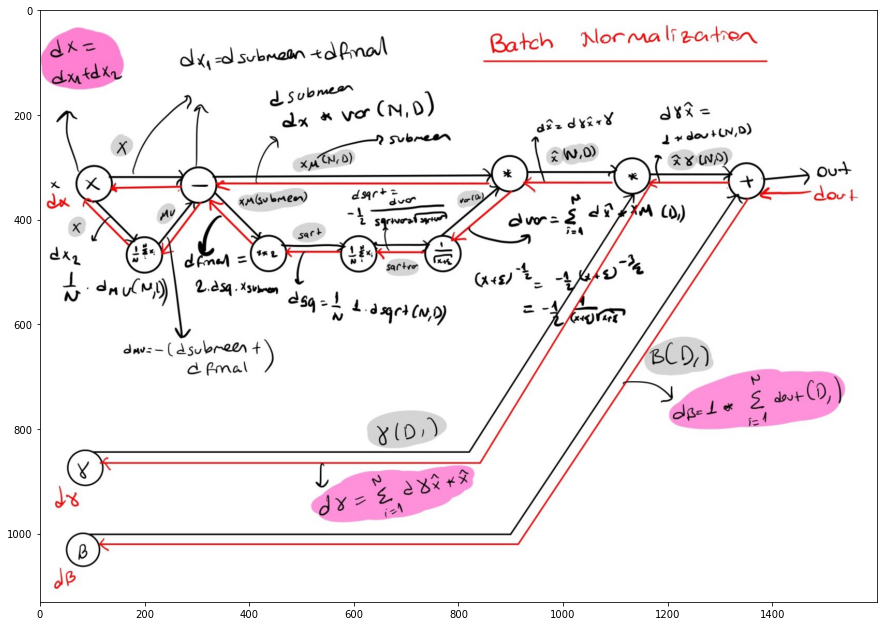

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('./bn.jpeg')   # Open image as PIL image object
plt.figure(figsize=(15, 15))
plt.imshow(img)